<a href="https://colab.research.google.com/github/kevinluyo42/UTEC_DS-IA/blob/Development/1_hill_climbing_teacher.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hill climbing search

![](https://drive.google.com/uc?export=view&id=1IlgFVvt98JrqeC7A1eracheX7oUHBx0E)

In [ ]:
import numpy as np

TSP = [
    [0,   200,  600,  100],
    [200,   0,  300,  100],
    [600, 300,  0,    400],
    [100, 100,  400,  0],
]

# Step 1
current_solution = np.array([0,1,2,3])
np.random.shuffle( current_solution )

print(current_solution)

[1 3 2 0]


In [ ]:
def fitness(sol):
  distance = 0
  for i in range(  len(sol) - 1  ):
    distance = distance + TSP[ sol[i] ][ sol[i+1] ]

  return distance

print( fitness(current_solution) )

1100


In [ ]:
def get_neighbors(sol):
  neighbors = []

  for i in range( len(sol) - 1 ):
    for j in range( i + 1, len(sol) ):
      new_sol = sol.copy()
      new_sol[i], new_sol[j]  = new_sol[j] , new_sol[i] # swap
      neighbors.append(new_sol)

  return neighbors

print( current_solution )
print( get_neighbors(current_solution) )

[1 3 2 0]
[array([3, 1, 2, 0]), array([2, 3, 1, 0]), array([0, 3, 2, 1]), array([1, 2, 3, 0]), array([1, 0, 2, 3]), array([1, 3, 0, 2])]


In [ ]:
def hill_climbing():
  # step 1:
  current_solution = np.array([0,1,2,3])
  np.random.shuffle( current_solution )

  while True:
    print("Iteration...")
    neighbors = get_neighbors(current_solution)
    best_neighbor = min( neighbors, key = fitness )

    print("current_solution", current_solution, " fitness:", fitness( current_solution ) )
    print("neighbors", neighbors)
    print("best_neighbor", best_neighbor, " fitness:", fitness( best_neighbor ) )
    print()

    if fitness(best_neighbor) < fitness( current_solution ):
      current_solution = best_neighbor
    else:
      return current_solution

hill_climbing()





Iteration...
current_solution [2 3 0 1]  fitness: 700
neighbors [array([3, 2, 0, 1]), array([0, 3, 2, 1]), array([1, 3, 0, 2]), array([2, 0, 3, 1]), array([2, 1, 0, 3]), array([2, 3, 1, 0])]
best_neighbor [2 1 0 3]  fitness: 600

Iteration...
current_solution [2 1 0 3]  fitness: 600
neighbors [array([1, 2, 0, 3]), array([0, 1, 2, 3]), array([3, 1, 0, 2]), array([2, 0, 1, 3]), array([2, 3, 0, 1]), array([2, 1, 3, 0])]
best_neighbor [2 1 3 0]  fitness: 500

Iteration...
current_solution [2 1 3 0]  fitness: 500
neighbors [array([1, 2, 3, 0]), array([3, 1, 2, 0]), array([0, 1, 3, 2]), array([2, 3, 1, 0]), array([2, 0, 3, 1]), array([2, 1, 0, 3])]
best_neighbor [2 1 0 3]  fitness: 600



array([2, 1, 3, 0])

# HC con plot

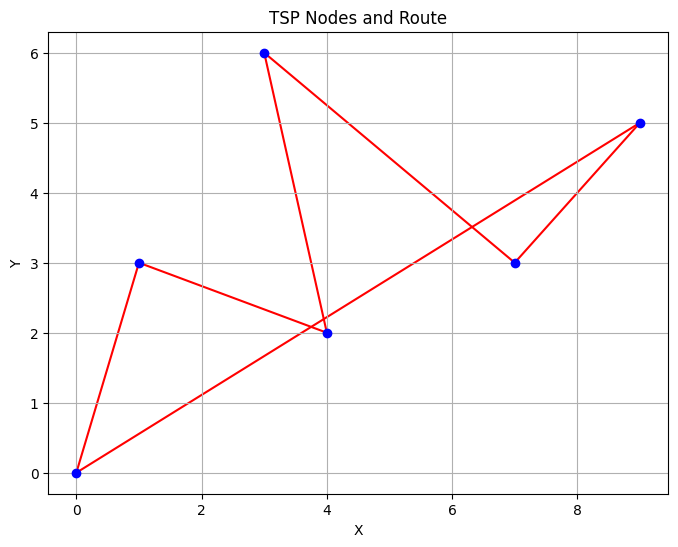

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform

def plot_tsp(nodes, route):
    """
    Plot the TSP nodes and route.

    Parameters:
    - nodes: List of tuples containing the coordinates of each node.
    - route: List of node indices representing the TSP route.
    """
    x = [node[0] for node in nodes]
    y = [node[1] for node in nodes]

    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, color='blue', zorder=2)  # Plot nodes


    for i in range(len(route) - 1):
        node1 = route[i]
        node2 = route[i + 1]
        plt.plot([nodes[node1][0], nodes[node2][0]], [nodes[node1][1], nodes[node2][1]], color='red', zorder=1)  # Plot route

    # Connect the last node to the first node to form a loop
    node1 = route[-1]
    node2 = route[0]
    plt.plot([nodes[node1][0], nodes[node2][0]], [nodes[node1][1], nodes[node2][1]], color='red', zorder=1)  # Plot route

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('TSP Nodes and Route')
    plt.grid(True)
    plt.show()

# Example usage:
nodes = [(0, 0), (1, 3), (4, 2), (3, 6), (7, 3), (9, 5)]  # Coordinates of nodes
route = [0, 1, 2, 3, 4, 5]  # Example TSP route (indices of nodes)

plot_tsp(nodes, route)

In [ ]:
N = 100 # cantidad de ciudades
positions = np.random.rand(N, 2) # generar las ciudades
distances = squareform(pdist(positions, 'euclidean')) # distancias entre ciudades


In [ ]:
def fitness(sol):
  distance = 0
  for i in range( len(sol) - 1 ):
    distance = distance + distances[ sol[i]  ][ sol[i+1]  ]

  return distance

print( fitness(current_solution) )

def get_neighbors(sol):
  neighbors = []
  for i in range(len(sol) - 1):
    for j in range( i + 1, len(sol) ):
      new_sol = sol.copy()
      new_sol[i], new_sol[j] = new_sol[j], new_sol[i]
      neighbors.append(new_sol)
  return neighbors

1.0799200543453167


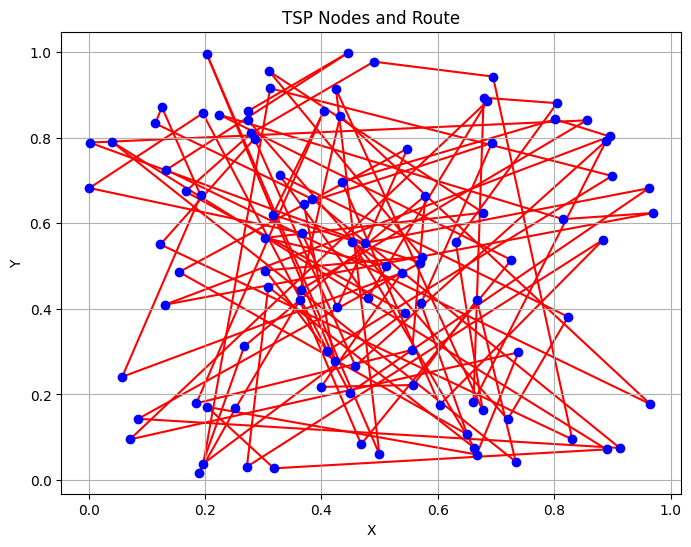

Iteration...
fitness current_solution 48.31415966894583
fitness best_neighbor 45.23595244853375

Iteration...
fitness current_solution 45.23595244853375
fitness best_neighbor 42.960414573015996

Iteration...
fitness current_solution 42.960414573015996
fitness best_neighbor 40.85777827045246

Iteration...
fitness current_solution 40.85777827045246
fitness best_neighbor 39.12748539211858

Iteration...
fitness current_solution 39.12748539211858
fitness best_neighbor 37.467086389767424

Iteration...
fitness current_solution 37.467086389767424
fitness best_neighbor 36.039246200466415

Iteration...
fitness current_solution 36.039246200466415
fitness best_neighbor 34.64559104088646

Iteration...
fitness current_solution 34.64559104088646
fitness best_neighbor 33.41783083992398

Iteration...
fitness current_solution 33.41783083992398
fitness best_neighbor 32.16506332345541

Iteration...
fitness current_solution 32.16506332345541
fitness best_neighbor 31.05515458744438

Iteration...
fitness cur

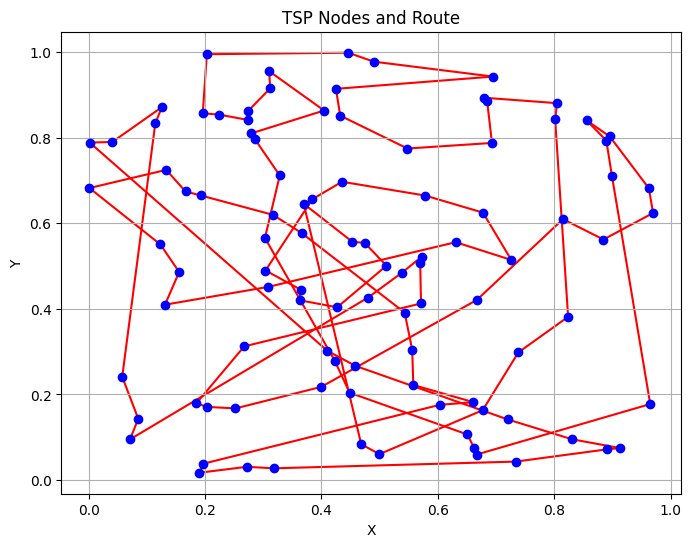


 'good' solution: [ 6 88 62 41 42 63 22 57 56 24  2 71 93 30 39 11 78 26 60 77 74 55 97 13
 34 51 84 50 10 48 82 99 75 92 81 66 79 65 96 25 61 72 17 64 40 53 98 32
 27 31  4  8  1 44 46 89 45 67  9 59 33 49 36 19 95 73 37 16 15 83 54  0
 14 21 91 23 52 70 12 20 35 85  7 94 69 87 86 47  3 29 38 68  5 43 76 58
 80 18 28 90]


In [ ]:
def hill_climbing():
  # step 1: Solucion inicial
  current_solution = np.array(range(N))
  np.random.shuffle(current_solution)

  plot_tsp(positions, current_solution)

  while True:
    print("Iteration...")
    # step: generar vecinos
    neighbors = get_neighbors(current_solution)
    best_neighbor = min(neighbors, key=fitness)

    #print("current_solution", current_solution)
    print("fitness current_solution", fitness(current_solution))
    #print("neighbors", neighbors)
    #print("best_neighbor", best_neighbor)
    print("fitness best_neighbor", fitness(best_neighbor))

    if fitness(best_neighbor) < fitness(current_solution):
      current_solution = best_neighbor
    else:
      return current_solution

    print("")

solution = hill_climbing()
plot_tsp(positions, solution)

print("\n 'good' solution:", solution)


